In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import pickle


In [2]:
# #############################################################################
# Load data
data = pd.read_csv('../../RealData/RealData.csv')
data = data.drop(['id','MEM'], axis=1)

In [3]:
# #############################################################################
# Training and Testing Data
X = data[['throughput']]
y = data['CPU']
X = X.fillna(X.mean())
scaler = MinMaxScaler(feature_range=(0, 10))
X = scaler.fit_transform(X)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

n = len(X)
kf = KFold(n_splits=5)
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [4]:
# #############################################################################
# Fit regression model
svr_lin = SVR(kernel='poly', degree=1, C=10, gamma='scale')
svr_lin.fit(X_train, y_train)


SVR(C=10, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='scale',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [5]:
prediction = svr_lin.predict(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
df

,Actual,Predicted
0,0.9,0.300371
1,0.9,0.300373
2,0.9,0.300368
3,0.9,0.300379
4,0.9,0.300370
5,0.9,0.300385
6,0.9,0.300379
7,0.9,0.300377
8,0.9,0.300366
9,0.9,0.300383


Text(0, 0.5, 'Predicted Y')

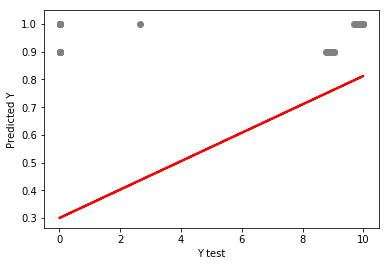

In [6]:
#Plot prediction
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, prediction, color='red', linewidth=2)
plt.xlabel("Y test")
plt.ylabel("Predicted Y")



In [7]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))



MAE: 0.4087563810255458
MSE: 0.22627892028429897
RMSE: 0.47568783911752355


In [8]:
# save the model to disk
filename = '../models/PolySVM_model.sav'
pickle.dump(svr_lin, open(filename, 'wb'))

In [9]:
svr_lin.predict([[0]])

array([0.29981764])